# Tutorial PCA + SVM

### Loading the dataset

In [1]:
import pandas as pd
url = "C:/Users/gesto/Downloads/archive (2)/data.csv"

df = pd.read_csv(url)
df.drop(['id', 'Unnamed: 32'], axis= 1, inplace= True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Standardizing the parameters

In [2]:
from sklearn.preprocessing import StandardScaler

df_ = df.drop(['diagnosis'], axis= 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_)

### Choosing the number of components

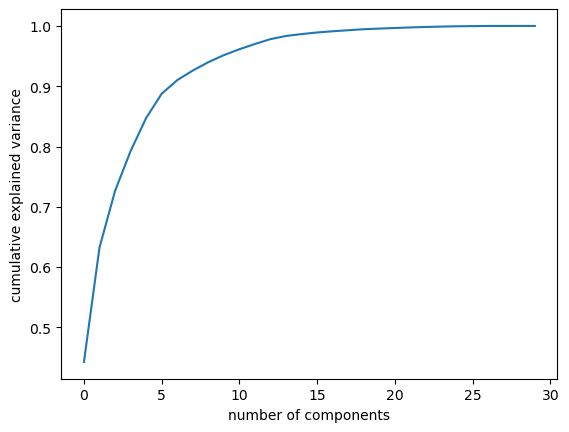

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X_scaled.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Reducing to 2 variables and checking how diagnosis varies

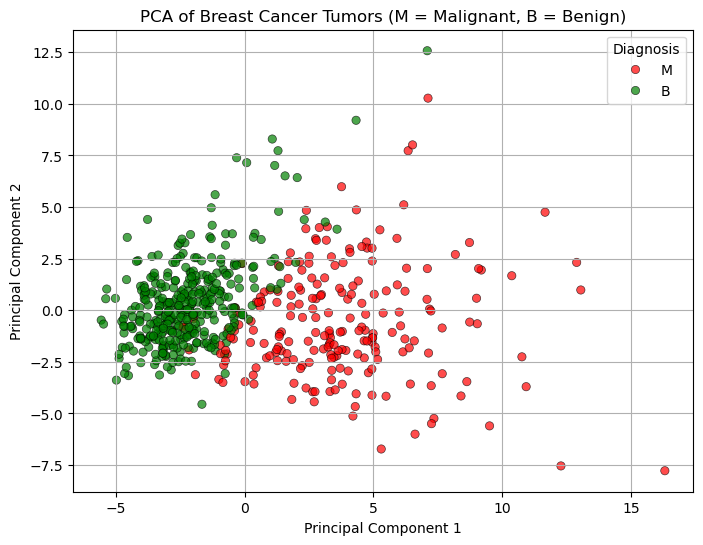

In [5]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame with PCA results and diagnosis
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = df['diagnosis'].values  # assumes df["diagnosis"] exists

# Plot with color based on diagnosis
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='diagnosis',
    data=pca_df,
    palette={'M': 'red', 'B': 'green'},
    alpha=0.7,
    edgecolor='k'
)
plt.title('PCA of Breast Cancer Tumors (M = Malignant, B = Benign)')
plt.grid(True)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis')
plt.show()


## Using a Support Vector Machine

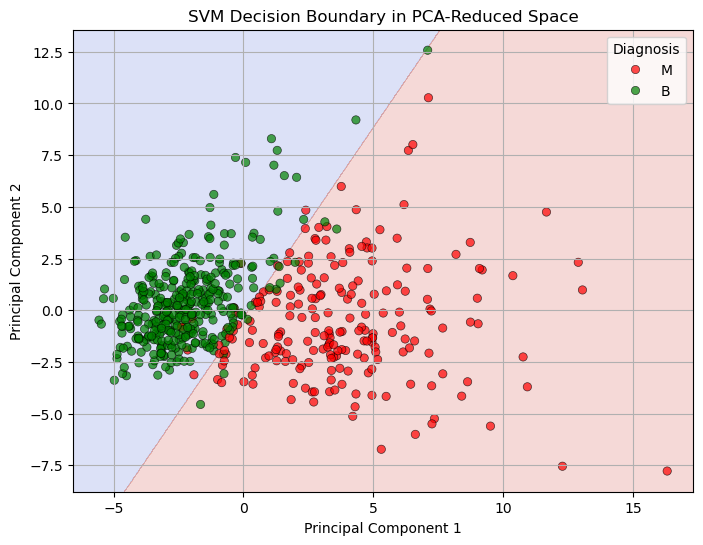

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode diagnosis labels: 'M' -> 1, 'B' -> 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(pca_df['diagnosis'])

# Train SVM on the 2D PCA-transformed data
svm_clf = SVC(kernel='linear', C=1.0)
svm_clf.fit(pca_df[['PC1', 'PC2']].to_numpy(), y)

# Create a mesh grid to plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1
y_min, y_max = pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over mesh grid
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
sns.scatterplot(
    x='PC1', y='PC2',
    hue='diagnosis',
    data=pca_df,
    palette={'M': 'red', 'B': 'green'},
    alpha=0.7,
    edgecolor='k'
)
plt.title('SVM Decision Boundary in PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.show()


## Studying results

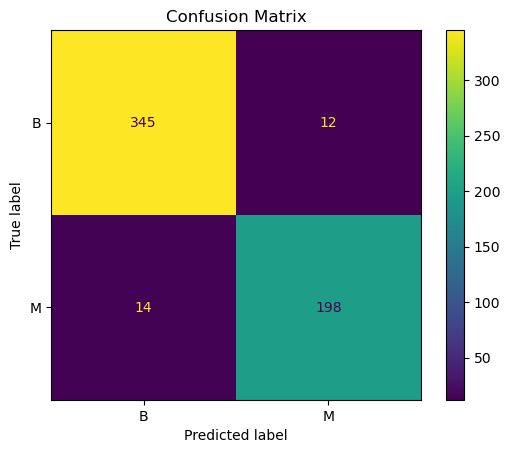

Accuracy: 0.9543


In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Predict on the training data
y_pred = svm_clf.predict(pca_df[['PC1', 'PC2']].to_numpy())

# Compute confusion matrix
cm = confusion_matrix(y, y_pred, labels=[0, 1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# Print accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")


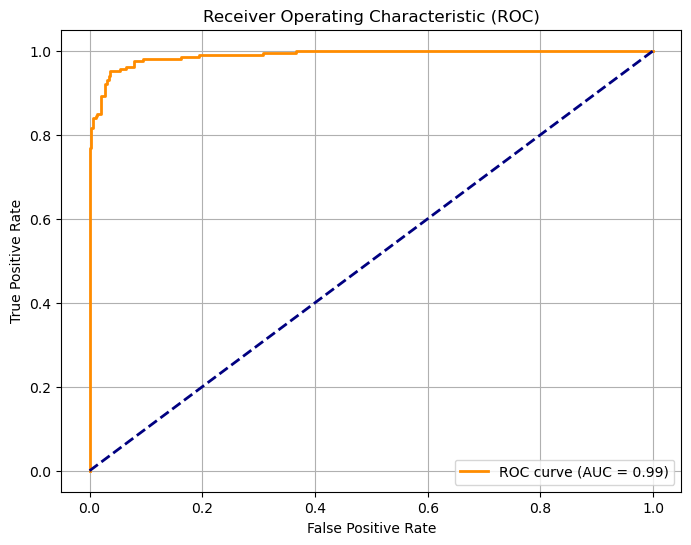

In [8]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities (decision function for SVM)
y_scores = svm_clf.decision_function(pca_df[['PC1', 'PC2']].to_numpy())

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
